# **Import Libraries**

In [275]:
import pandas as pd
import numpy as np

import plotly.express as xp
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, GridSearchCV, KFold, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import OneHotEncoder

import pickle

# **Load Data**

In [276]:
import pandas as pd

df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# **Data Preprocessing**

In [277]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [279]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [280]:
df.describe(include=[object])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


## Handling Missing Value

## Data separation as X and y

## Data Splitting

In [281]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [282]:
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
2142,Female,0,No,Yes,21,Yes,No,DSL,Yes,No,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.80
1623,Female,0,No,No,54,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45
6074,Male,0,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45
1362,Male,0,No,No,4,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95
6754,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,Male,0,Yes,No,1,Yes,No,Fiber optic,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95.00
5191,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.30
5226,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05
5390,Male,1,No,No,12,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15


In [283]:
X_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
185,Female,0,Yes,No,1,No,No phone service,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,24.80,24.80
2715,Male,0,No,No,41,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Bank transfer (automatic),25.25,996.45
3825,Female,0,Yes,Yes,52,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1031.70
1807,Female,0,No,No,1,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Electronic check,76.35,76.35
132,Male,0,No,No,67,Yes,No,DSL,No,No,No,Yes,No,No,Two year,No,Bank transfer (automatic),50.55,3260.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6366,Female,0,Yes,No,64,Yes,No,DSL,No,Yes,Yes,Yes,No,Yes,Two year,Yes,Mailed check,68.30,4378.80
315,Male,0,Yes,Yes,51,Yes,Yes,Fiber optic,Yes,Yes,No,Yes,Yes,Yes,One year,No,Credit card (automatic),110.05,5686.40
2439,Male,0,Yes,Yes,17,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.90,329.75
5002,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,No,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.10


In [284]:
df.drop(columns = ['customerID'], inplace = True)

In [285]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [286]:
y = df['Churn']
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [287]:
X = df.drop('Churn', axis=1)
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60


In [288]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [289]:
df.dropna(inplace=True)

In [290]:
df.shape

(7032, 20)

In [291]:
df.duplicated().sum()

22

## Validate Categorical Data

In [292]:
def validate_test_data_categorical_columns(train_df, test_df):
    # Get the list of categorical columns for both train and test DataFrames
    train_df_categorical_columns = train_df.select_dtypes(include=['object', 'category']).columns.tolist()
    test_df_categorical_columns = test_df.select_dtypes(include=['object', 'category']).columns.tolist()

    # Check if the number of categorical columns is the same in both DataFrames
    if len(set(train_df_categorical_columns).intersection(set(test_df_categorical_columns))) == 0:
        print('Train and test dataframes have different categorical columns')
        return
    else:
        for cat_col in test_df_categorical_columns:
            # Create sets of unique values for the current categorical column in both DataFrames
            train_col = set(x for x in train_df[cat_col].unique().tolist() if not pd.isna(x))
            test_col = set(x for x in test_df[cat_col].unique().tolist() if not pd.isna(x))

            # Check if the sets are not equal, indicating different unique values
            if train_col != test_col:
                print(f'{cat_col} column has different unique values in train and test data:')
                print(f'Unique values in train data: {train_col}')
                print(f'Unique values in test data: {test_col}')
                return

        print('All categorical columns have consistent unique values in train and test data.')
        return

validate_test_data_categorical_columns(X_train, X_test)

All categorical columns have consistent unique values in train and test data.


In [293]:
label_encoder = LabelEncoder()

categorical_columns = [
    'gender', 
    'Partner',
    'Dependents',
    'PhoneService',
    'PaperlessBilling' , 
    'Churn',
    'Contract', 
    'MultipleLines', 
    'InternetService', 
    'OnlineSecurity', 
    'OnlineBackup', 
    'DeviceProtection', 
    'TechSupport', 
    'StreamingTV', 
    'StreamingMovies',
    'PaymentMethod'
]

label_encoders = {}

for column in categorical_columns:
    # Fit and transform the column
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    # Save the encoder
    label_encoders[column] = le

print("Encoded DataFrame:")
df.head()

Encoded DataFrame:


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [294]:
print("Label Encoding Mapping:")
for column, le in label_encoders.items():
    print(f"\nColumn: {column}")
    for i, label in enumerate(le.classes_):
        print(f"{i}: {label}")

Label Encoding Mapping:

Column: gender
0: Female
1: Male

Column: Partner
0: No
1: Yes

Column: Dependents
0: No
1: Yes

Column: PhoneService
0: No
1: Yes

Column: PaperlessBilling
0: No
1: Yes

Column: Churn
0: No
1: Yes

Column: Contract
0: Month-to-month
1: One year
2: Two year

Column: MultipleLines
0: No
1: No phone service
2: Yes

Column: InternetService
0: DSL
1: Fiber optic
2: No

Column: OnlineSecurity
0: No
1: No internet service
2: Yes

Column: OnlineBackup
0: No
1: No internet service
2: Yes

Column: DeviceProtection
0: No
1: No internet service
2: Yes

Column: TechSupport
0: No
1: No internet service
2: Yes

Column: StreamingTV
0: No
1: No internet service
2: Yes

Column: StreamingMovies
0: No
1: No internet service
2: Yes

Column: PaymentMethod
0: Bank transfer (automatic)
1: Credit card (automatic)
2: Electronic check
3: Mailed check


# Exploratory Data Analysis

In [295]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

scaler = StandardScaler()

# features = ['Age', 'StudyTimeWeekly', 'Absences', 'GPA']
# df[features] = scaler.fit_transform(df[features])

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

ValueError: could not convert string to float: 'Female'

# **Model Building**

## **K Nearest Neighbour (KNN)**

### **Training the Model**

In [268]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

### **Applying the Model to make a Prediction**

In [269]:
y_knn_pred = knn.predict(X_test)

In [270]:
y_knn_pred

array([0, 0, 1, ..., 0, 0, 0])

### **Evaluate Model Performance**

In [271]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

accuracy_knn = accuracy_score(y_test, y_knn_pred)
precision_knn = precision_score(y_test, y_knn_pred, average = 'weighted')
recall_knn = recall_score(y_test, y_knn_pred, average = 'weighted')
f1_knn = f1_score(y_test, y_knn_pred, average = 'weighted')
confusion_matrix = confusion_matrix(y_test, y_knn_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1, 2, 3, 4])

print('Accuracy:', accuracy_knn)
print('Precision:', precision_knn)
print('Recall:', recall_knn)
print('F1 Score:', f1_knn)
print()
print(classification_report(y_test, y_knn_pred))

Accuracy: 0.7405828002842928
Precision: 0.7403617959737312
Recall: 0.7405828002842928
F1 Score: 0.740471913031484

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1033
           1       0.51      0.51      0.51       374

    accuracy                           0.74      1407
   macro avg       0.67      0.67      0.67      1407
weighted avg       0.74      0.74      0.74      1407



In [272]:
knn_results = pd.DataFrame(['K Nearest Neighbour', accuracy_knn, precision_knn, recall_knn, f1_knn]).transpose()
knn_results.columns = ['Method', 'Accuracy', 'Precision', 'Recall', 'F1 Score']

In [273]:
knn_results

,Method,Accuracy,Precision,Recall,F1 Score
0,K Nearest Neighbour,0.740583,0.740362,0.740583,0.740472


ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (5).

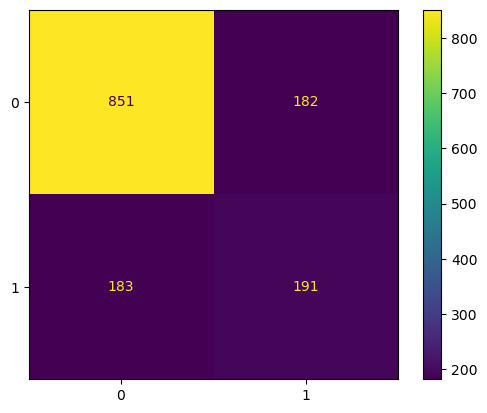

In [274]:
cm_display.plot()
plt.show()

## **Support Vector Machines (SVM)**


*   Support vector machines
* K-Nearest Neighbours
* Decision trees
* Artificial neural networks
* Logistic regression
* Naive Bayes
* Linear Discriminant Analysis (LDA)
* Quadratic Discriminant Analysis (QDA)

https://www.geeksforgeeks.org/machine-learning-model-evaluation/



### **Training the Model**

In [ ]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

SVC()

### **Applying the Model to make a Prediction**

In [ ]:
y_svm_pred = svm.predict(X_test)

In [ ]:
y_svm_pred

array([4., 2., 4., 1., 4., 2., 4., 4., 3., 4., 2., 4., 2., 3., 2., 4., 4.,
       4., 4., 2., 3., 4., 4., 1., 4., 4., 3., 2., 4., 4., 4., 4., 1., 2.,
       4., 4., 1., 2., 2., 4., 3., 1., 4., 2., 4., 3., 2., 4., 2., 4., 2.,
       1., 4., 4., 4., 1., 3., 1., 4., 2., 4., 4., 3., 4., 4., 3., 1., 3.,
       4., 1., 1., 4., 1., 2., 4., 2., 4., 4., 4., 4., 4., 1., 4., 4., 4.,
       4., 0., 4., 4., 4., 2., 4., 4., 4., 4., 4., 1., 4., 4., 4., 4., 3.,
       4., 4., 4., 3., 2., 4., 4., 4., 4., 4., 1., 4., 4., 4., 4., 2., 4.,
       4., 4., 1., 2., 4., 4., 4., 3., 4., 3., 2., 4., 1., 2., 4., 4., 4.,
       4., 4., 4., 4., 3., 4., 1., 4., 1., 4., 4., 3., 2., 4., 2., 4., 1.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 3., 2.,
       4., 1., 2., 4., 4., 3., 2., 4., 3., 4., 2., 4., 4., 1., 2., 1., 1.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 3., 2., 4., 2., 4., 2.,
       1., 3., 4., 1., 2., 4., 4., 4., 3., 2., 3., 4., 2., 1., 4., 2., 4.,
       3., 1., 4., 4., 4.

### **Evaluate Model Performance**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

accuracy_svm = accuracy_score(y_test, y_svm_pred)
precision_svm = precision_score(y_test, y_svm_pred, average = 'weighted')
recall_svm = recall_score(y_test, y_svm_pred, average = 'weighted')
f1_svm = f1_score(y_test, y_svm_pred, average = 'weighted')
confusion_matrix = confusion_matrix(y_test, y_svm_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1, 2, 3, 4])

print('Accuracy:', accuracy_svm)
print('Precision:', precision_svm)
print('Recall:', recall_svm)
print('F1 Score:', f1_svm)
print()
print(classification_report(y_test, y_svm_pred))

Accuracy: 0.6743215031315241
Precision: 0.678384906584031
Recall: 0.6743215031315241
F1 Score: 0.6535332629983528

              precision    recall  f1-score   support

         0.0       1.00      0.05      0.09        22
         1.0       0.44      0.45      0.44        49
         2.0       0.46      0.54      0.50        85
         3.0       0.48      0.37      0.42        86
         4.0       0.85      0.94      0.89       237

    accuracy                           0.67       479
   macro avg       0.65      0.47      0.47       479
weighted avg       0.68      0.67      0.65       479



In [ ]:
svm_results = pd.DataFrame(['Support Vector Machines', accuracy_svm, precision_svm, recall_svm, f1_svm]).transpose()
svm_results.columns = ['Method', 'Accuracy', 'Precision', 'Recall', 'F1 Score']

In [ ]:
svm_results

,Method,Accuracy,Precision,Recall,F1 Score
0,Support Vector Machines,0.674322,0.678385,0.674322,0.653533


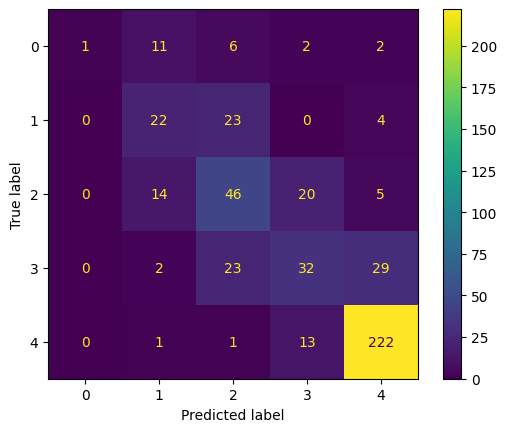

In [ ]:
cm_display.plot()
plt.show()

## **Logistic Regression**

### **Training the Model**

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000) #the max iter need to be removed after done the data prep processing
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### **Applying the Model to make a Prediction**

In [ ]:
y_lr_pred = lr.predict(X_test)

In [ ]:
y_lr_pred

array([4., 2., 4., 1., 4., 2., 4., 3., 3., 4., 3., 4., 1., 3., 2., 4., 4.,
       4., 4., 0., 3., 4., 4., 0., 4., 4., 4., 2., 4., 4., 4., 4., 1., 2.,
       4., 4., 1., 2., 0., 4., 2., 1., 4., 3., 4., 2., 0., 4., 1., 4., 2.,
       1., 4., 4., 4., 0., 3., 1., 4., 4., 4., 4., 3., 4., 4., 3., 1., 2.,
       4., 1., 1., 4., 1., 2., 4., 2., 4., 4., 4., 4., 4., 1., 3., 4., 4.,
       4., 1., 4., 4., 4., 3., 4., 4., 4., 4., 4., 1., 4., 4., 4., 4., 3.,
       4., 4., 4., 3., 2., 4., 4., 4., 4., 4., 2., 4., 4., 4., 4., 2., 4.,
       3., 4., 1., 1., 4., 4., 4., 3., 4., 4., 2., 4., 1., 2., 4., 4., 4.,
       4., 4., 4., 4., 2., 4., 2., 4., 2., 4., 4., 3., 1., 4., 0., 4., 1.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 2., 1.,
       4., 1., 2., 4., 4., 3., 2., 4., 2., 4., 2., 4., 4., 1., 2., 2., 1.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 2., 2., 4., 2., 4., 4.,
       1., 4., 4., 2., 3., 4., 4., 4., 3., 2., 2., 4., 2., 1., 4., 2., 4.,
       2., 1., 4., 4., 4.

### **Evaluate Model Performance**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

accuracy_lr = accuracy_score(y_test, y_lr_pred)
precision_lr = precision_score(y_test, y_lr_pred, average = 'weighted')
recall_lr = recall_score(y_test, y_lr_pred, average = 'weighted')
f1_lr = f1_score(y_test, y_lr_pred, average = 'weighted')
confusion_matrix = confusion_matrix(y_test, y_lr_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1, 2, 3, 4])

print('Accuracy:', accuracy_lr)
print('Precision:', precision_lr)
print('Recall:', recall_lr)
print('F1 Score:', f1_lr)
print()
print(classification_report(y_test, y_lr_pred))

Accuracy: 0.6826722338204593
Precision: 0.6453972806394112
Recall: 0.6826722338204593
F1 Score: 0.658801018929189

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        22
         1.0       0.39      0.39      0.39        49
         2.0       0.53      0.58      0.55        85
         3.0       0.53      0.36      0.43        86
         4.0       0.84      0.96      0.90       237

    accuracy                           0.68       479
   macro avg       0.46      0.46      0.45       479
weighted avg       0.65      0.68      0.66       479



In [ ]:
lr_results = pd.DataFrame(['Logistic Regression', accuracy_lr, precision_lr, recall_lr, f1_lr]).transpose()
lr_results.columns = ['Method', 'Accuracy', 'Precision', 'Recall', 'F1 Score']

In [ ]:
lr_results

,Method,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.682672,0.645397,0.682672,0.658801


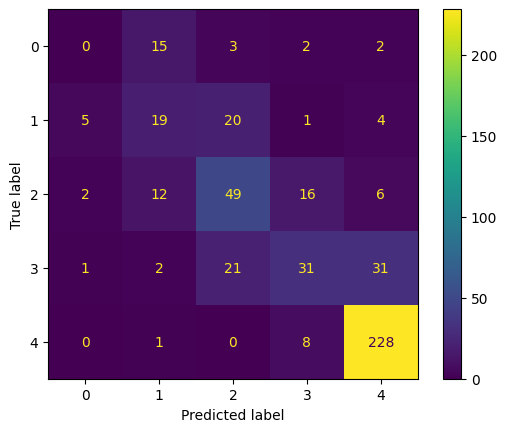

In [ ]:
cm_display.plot()
plt.show()

## **Random Forest**

### **Training the Model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

### **Applying the Model to make a Prediction**

In [ ]:
y_rf_pred = rf.predict(X_test)

In [ ]:
y_rf_pred

array([4., 1., 4., 1., 4., 2., 4., 4., 3., 4., 2., 4., 2., 2., 2., 4., 4.,
       4., 4., 3., 3., 4., 4., 1., 4., 4., 4., 2., 4., 4., 4., 4., 3., 1.,
       4., 4., 1., 2., 0., 4., 2., 1., 4., 2., 4., 2., 2., 4., 2., 4., 2.,
       1., 4., 4., 4., 1., 3., 1., 4., 3., 4., 4., 3., 4., 4., 2., 1., 2.,
       4., 1., 0., 4., 1., 2., 4., 2., 4., 4., 4., 4., 4., 1., 3., 4., 4.,
       4., 0., 4., 4., 4., 2., 4., 4., 4., 4., 4., 1., 4., 4., 4., 4., 3.,
       4., 4., 4., 3., 2., 4., 4., 4., 4., 4., 1., 4., 4., 4., 3., 2., 4.,
       4., 4., 1., 1., 4., 4., 4., 3., 4., 4., 2., 4., 0., 2., 4., 4., 4.,
       3., 4., 4., 4., 3., 4., 1., 4., 2., 4., 4., 3., 2., 4., 2., 4., 1.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 2., 2.,
       4., 1., 2., 4., 4., 3., 3., 4., 4., 4., 1., 4., 4., 1., 2., 1., 3.,
       4., 4., 4., 4., 3., 4., 4., 4., 4., 4., 3., 2., 2., 4., 2., 4., 2.,
       2., 4., 4., 1., 3., 4., 4., 4., 3., 2., 2., 4., 2., 1., 4., 2., 4.,
       2., 1., 4., 4., 4.

### **Evaluate Model Performance**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

accuracy_rf = accuracy_score(y_test, y_rf_pred)
precision_rf = precision_score(y_test, y_rf_pred, average = 'weighted')
recall_rf = recall_score(y_test, y_rf_pred, average = 'weighted')
f1_rf = f1_score(y_test, y_rf_pred, average = 'weighted')
confusion_matrix = confusion_matrix(y_test, y_rf_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[0, 1, 2, 3, 4])

print('Accuracy:', accuracy_rf)
print('Precision:', precision_rf)
print('Recall:', recall_rf)
print('F1 Score:', f1_rf)
print()
print(classification_report(y_test, y_rf_pred))

Accuracy: 0.7098121085594989
Precision: 0.6938824740658271
Recall: 0.7098121085594989
F1 Score: 0.692718448580282

              precision    recall  f1-score   support

         0.0       0.60      0.14      0.22        22
         1.0       0.56      0.57      0.57        49
         2.0       0.54      0.58      0.56        85
         3.0       0.52      0.42      0.46        86
         4.0       0.85      0.95      0.89       237

    accuracy                           0.71       479
   macro avg       0.61      0.53      0.54       479
weighted avg       0.69      0.71      0.69       479



In [ ]:
rf_results = pd.DataFrame(['Random Forest', accuracy_rf, precision_rf, recall_rf, f1_rf]).transpose()
rf_results.columns = ['Method', 'Accuracy', 'Precision', 'Recall', 'F1 Score']

In [ ]:
rf_results

,Method,Accuracy,Precision,Recall,F1 Score
0,Random Forest,0.709812,0.693882,0.709812,0.692718


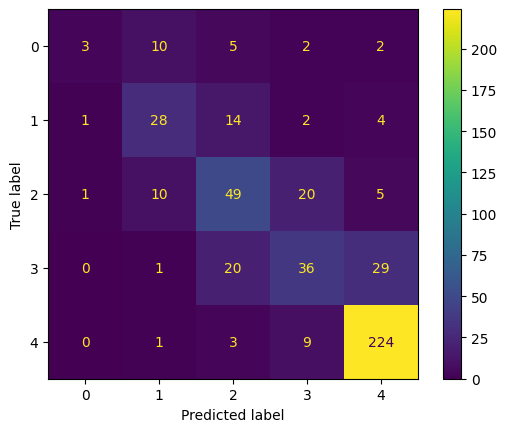

In [ ]:
cm_display.plot()
plt.show()

## **Artificial Neural Network (ANN) accuracy veliveli low**

### **Training the Model**

In [ ]:
# import keras
# from keras.models import Sequential
# from keras.layers import Dense

# # Create the model
# ann_model = Sequential()
# ann_model.add(Dense(6, activation = 'relu', input_dim = 12))
# ann_model.add(Dense(6, activation = 'relu'))
# ann_model.add(Dense(1, activation = 'sigmoid'))

# # ann_model.add(Dense(12, input_dim=13, activation='relu'))
# # ann_model.add(Dense(8, activation='relu'))
# # ann_model.add(Dense(1, activation='sigmoid'))

# # Compile the model
# ann_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# # Train the model
# # ann_model.fit(X_train, y_train, epochs=150, batch_size=10, verbose=0)
# ann_model.fit(X_train, y_train, batch_size = 10, epochs = 100)

# # Predictions
# # y_pred_ann = (ann_model.predict(X_test) > 0.5).astype("int32")
# y_pred_ann = ann_model.predict(X_test)
# y_pred_ann = (y_pred_ann > 0.5)

# # Evaluate
# accuracy_ann = accuracy_score(y_test, y_pred_ann)
# precision_ann = precision_score(y_test, y_pred_ann, average = 'weighted')
# recall_ann = recall_score(y_test, y_pred_ann, average = 'weighted')

# print(classification_report(y_test, y_pred_ann))

# **Model Comparison**

In [ ]:
df_models = pd.concat([knn_results, lr_results, rf_results], axis=0)
df_models.reset_index(drop=True)

,Method,Accuracy,Precision,Recall,F1 Score
0,K Nearest Neighbour,0.563674,0.542314,0.563674,0.550813
1,Logistic Regression,0.682672,0.645397,0.682672,0.658801
2,Random Forest,0.709812,0.693882,0.709812,0.692718
